# Libraries

In [28]:
# Install libraries as needed
# pip install pandas
# pip install matplotlib
# pip install sklearn
# pip install plotnine 
# pip install numpy

# Import necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from plotnine import *
import numpy as np
%matplotlib inline

# Global Plot Formatting
params = {'legend.fontsize': '40',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

# Check current path
os.getcwd()

'/Users/danicurl/Jupyter'

# Functions

In [ ]:
# Function used to clean up data in preparation for plotting (can be used for infection and death data)
# Input: Dataset with the Province/State, Lat, Long columns removed, string name of 3 countries
# Output: A list of dates, a list of infections or deaths for 3 countries (4 lists total)
# Example: prep_data(data, "Italy", "Iran", "US")

def prep_data(data, country1, country2, country3):
    # Prepping data for Line Plot
    # Getting dates of data collection (column headers in this case); This will be my X-axis
    covid_dates = list(data.columns) #list type
    covid_dates.remove('Country/Region') # dropping the 'Country/Region' column header, I only want dates

    # Getting deaths for each date for Italy, Iran, and America
    # Italy
    country1_data = data.loc[data['Country/Region'] == country1] # Query out first country's row
    country1_data = country1_data.drop(columns=['Country/Region']) # Drop country/region column (only need deaths)
    country1_data = country1_data.sum().tolist() # convert to list

    country2_data = data.loc[data['Country/Region'] == country2] # Query out second country's row
    country2_data = country2_data.drop(columns=['Country/Region']) # Drop country/region column (only need deaths)
    country2_data = country2_data.sum().tolist() # convert to list

    country3_data = data.loc[data['Country/Region'] == country3] # Query out third country's rows
    country3_data = country3_data.drop(columns=['Country/Region']) # Drop country/region column (only need deaths)
    country3_data = country3_data.sum().tolist() # convert to list
    
    return covid_dates, country1_data, country2_data, country3_data

# Function to plot death data as line graph
# Note: data_prep function will return all necessary variables for input (see below)
# Input: List of dates, list of deaths for 3 countries
# Output: Comparison line chart of 3 countries deaths per date
def line_plot_deaths(dates, country1, country2, country3): 
    plt.figure(figsize=(20,10)) # Adjust size of plot
    plt.plot(dates, country1, color='green', label = "Italy") # Add Italy's line
    plt.plot(dates, country2, color='orange', label = "Iran") # Add Iran's line
    plt.plot(dates, country3, color='blue', label = "USA") # Add USA's line
    plt.xlabel('Dates (1/22/2020 to 3/22/2020)') # X axis label
    plt.xticks(rotation=45)
    plt.ylabel('Number of Deaths') # Y axis label
    plt.title('Covid-19 Deaths per Day for USA, Iran, Italy') # Plot Title
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # Legend
    return plt.show()

# Function to plot infection data as line graph
# Note: data_prep function will return all necessary variables for input (see below)
# Input: List of dates, list of infections for 3 countries
# Output: Comparison line chart of 3 countries infections per date
def line_plot_infections(dates, country1, country2, country3):
    plt.figure(figsize=(30,10))
    plt.plot(dates, country1, color='green', label = "Italy") # Add first country's line
    plt.plot(dates, country2, color='orange', label = "Iran") # Add second country's line
    plt.plot(dates, country3, color='blue', label = "USA") # Add third country's line
    plt.xlabel('Dates (1/22/2020 to Current)', fontsize = '25') # X axis label
    plt.ylabel('Number of Infections', fontsize = '25') # Y axis label
    plt.title('Confirmed Covid-19 Infections per Day for Italy, Iran, USA', fontsize = '30') # Plot Title
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = '25', borderaxespad=0.) # Legend
    return plt.show()

# Function to plot Infections vs Deaths of a provided country
# Input: List of dates, list of infections for a country, list of deaths for same country, string of country name
# Output: Graph of Infections vs Deaths for a particular date and country
# Example: plot_infections_vs_death(dates, infections, deaths, "USA")
def plot_infections_vs_death(dates, infections, deaths, country): 
    plt.figure(figsize=(30,10))
    plt.plot(dates, infections, color='blue', label = "Covid-19 Infections") # USA Infections line
    plt.plot(dates, deaths, color='lightblue', label = "Covid-19 Deaths") # USA Death line
    plt.xlabel('Dates (2/22/2020 to Current)', fontsize = '25') # X Axis label
    plt.ylabel('Number of People', fontsize = '25') # Y Axis label
    plt.title('Covid-19 Confirmed Infections vs Deaths for ' + country, fontsize = '30') # Plot Title
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = '25', borderaxespad=0.) # Legend
    return plt.show()

# Subset data to last 30 days 
# Input: list of dates, list of deaths/infections for 3 countries (4 lists total)
# Output: A subset of these lists of the last 30 days
def last_30_days(dates, country1, country2, country3):
    dates_last30 = covid_death_dates[-30:]
    country1_last30 = country1[-30:]
    country2_last30 = country2[-30:]
    country3_last30 = country3[-30:]
    return dates_last30, country1_last30, country2_last30, country3_last30

# Business Understanding


# Analysis
## I. COVID-19 DEATH ANALYSIS FOR IRAN, ITALY, USA
### Data Understanding
This data appears to be made up of 2 categorical variables (Province/State and Country/Region), the rest are quantitative. Two of the quatitative variables represent the Latitude and Longitude of the country (Lat and Long), the rest show the amount of deaths per country per day. Each row represents a country, or in some cases, a particular region, state, or city as part of the country.

In [29]:
# Grab Covid Death data from JHU (Last Pull: 3/24/2020)
# Location of Data (in case URL changes): https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases
# NOTE: The URL DOES CHANGE with updates!!
url_death = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv"
covid_deaths = pd.read_csv(url_death)

In [30]:
# Quick Glance at Covid-19 Death data
covid_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Preparation
To prepare the data for graphing I took the following steps.

**1. Drop un-neccessary columns** - Next, I decdied to drop the Province/State, Latititude and Longitude columns. The Province/State columns had a lot of missing data, it was mostly being used here and there to specifiy specific cities and states in the United States. Since I am looking at countries as a whole in this part of the analysis, I didn't need this column. Latitude and Longitude were dropped because coordinates were not relevant to my analysis.

**2. Additional Data Prep** - The rest of the data contained no missing values so my last data prep was to create four lists (using the data_prep function): One list of all dates that data was collected (the column names in the original data set), and one list each of deaths recorded per day for 3 countries (in this case, Italy, Iran, and USA).

In [31]:
# Droping Following Columns:
# Province/State - In this analysis I am looking at countries as a whole so I do not need this column
# Lat/Long - Latitute and Longitude do not play a role in my analysis at the moment
covid_deaths = covid_deaths.drop(columns=['Province/State', 'Lat', 'Long'])
covid_deaths.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,Albania,0,0,0,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,4,5
2,Algeria,0,0,0,0,0,0,0,0,0,...,4,4,4,7,9,11,15,17,17,19
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Basic Analysis of Covid-19 Deaths
# Count, Mean, Standard Deviation, Minimum, Maximum, etc
# NOTE: this is calculated by day vice by country
covid_deaths.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,...,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.070539,0.074689,0.107884,0.174274,0.232365,0.340249,0.543568,0.551867,0.709544,0.883817,...,26.721992,29.568465,32.800830,36.236515,40.941909,46.883817,53.829876,60.792531,68.485477,77.282158
std,1.095066,1.096691,1.548110,2.577693,3.350987,4.896470,8.051861,8.052329,10.435450,13.140387,...,234.932387,249.464786,266.092453,288.904090,312.678557,347.681180,394.043325,436.858642,481.476108,535.162206
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000
max,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,162.000000,204.000000,...,3085.000000,3099.000000,3111.000000,3122.000000,3405.000000,4032.000000,4825.000000,5476.000000,6077.000000,6820.000000


In [142]:
## Prepare Death data for Italy, Iran and USA for graphing
covid_death_dates, italy_deaths, iran_deaths, usa_deaths = prep_data(covid_deaths, "Italy", "Iran", "US")

### Plotting Data

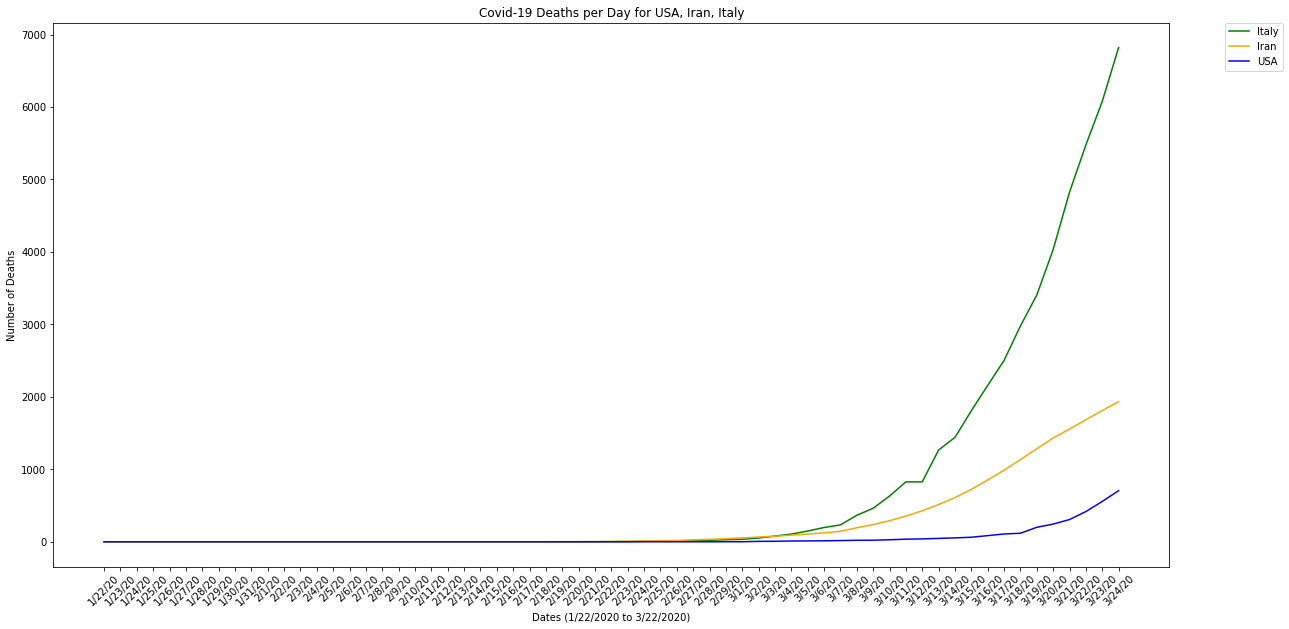

In [143]:
# Create Plot of Deaths per Day (each country has it's own line) since 1/22/2020
line_plot_deaths(covid_death_dates, italy_deaths, iran_deaths, usa_deaths)

## II. COVID-19 CONFIRMED INFECTION ANALYSIS FOR IRAN, ITALY, USA
### Data Understanding
This data appears to be made up of 2 categorical variables (Province/State and Country/Region), the rest are quantitative. Two of the quatitative variables represent the Latitude and Longitude of the country (Lat and Long), the rest show the amount of infections per country per day. Each row represents a country, or in some cases, a particular region, state, or city as part of the country.

In [74]:
# Grab Covid Infection data from JHU (Last Pull: 3/22/2020)
# Location of Data (in case URL changes): https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases
url_infection = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
covid_infections = pd.read_csv(url_infection)

In [75]:
# Quick glance
covid_infections.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3


### Data Preparation
To prepare the data for graphing I took the following steps.

**1. Drop un-neccessary columns** - Next, I again decdied to drop the Province/State, Latititude and Longitude columns. The Province/State columns had a lot of missing data, it was mostly being used here and there to specifiy specific cities and states in the United States. Since I am looking at countries as a whole in this part of the analysis, I didn't need this column. Latitude and Longitude were dropped because coordinates were not relevant to my analysis.

**2. Additional Data Prep** - The rest of the data contained no missing values so my last data prep was to create four lists (using the data_prep function): One list of all dates that data was collected (the column names in the original data set), and one list each of infections recorded per day for 3 countries (in this case, Italy, Iran, and USA).

In [76]:
# Droping Following Columns:
# Province/State - In this analysis I am looking at countries as a whole so I do not need this column
# Lat/Long - Latitute and Longitude do not play a role in my analysis at the moment
covid_infections = covid_infections.drop(columns=['Province/State', 'Lat', 'Long'])

# Verify columns were dropped
covid_infections.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,Albania,0,0,0,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,Algeria,0,0,0,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3


In [77]:
# Basic Analysis of Covid-19 Confirmed Infections
# Count, Mean, Standard Deviation, Minimum, Maximum, etc
# NOTE: this is calculated by day vice by country
covid_infections.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,...,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,2.293388,2.702479,3.888430,5.925620,8.752066,12.095041,23.049587,25.479339,34.024793,41.020661,...,691.958678,750.305785,814.471074,887.690083,1002.066116,1124.111570,1257.834711,1392.367769,1562.954545,1727.458678
std,28.596939,28.697201,35.720677,49.708806,69.461626,93.584604,229.737947,231.117710,318.506068,377.609894,...,4779.585960,4897.970334,5038.898265,5228.028772,5531.393858,5899.976366,6347.284375,6804.210903,7437.662622,8078.748046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,3.000000,3.000000,5.250000,6.000000,9.000000,11.250000,12.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.500000,19.000000,29.500000,35.500000,44.000000,52.500000,71.500000,76.000000,88.000000,95.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,118.500000,140.500000,170.250000,184.750000,233.250000,267.250000,306.000000,349.750000,400.250000,415.500000
max,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,4903.000000,5806.000000,...,67794.000000,67798.000000,67799.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000,69176.000000


In [131]:
# Prep infection data for plotting (Italy, Iran, USA)
covid_infections_dates, italy_infections, iran_infections, usa_infections = prep_data(covid_infections, "Italy", "Iran", "US")

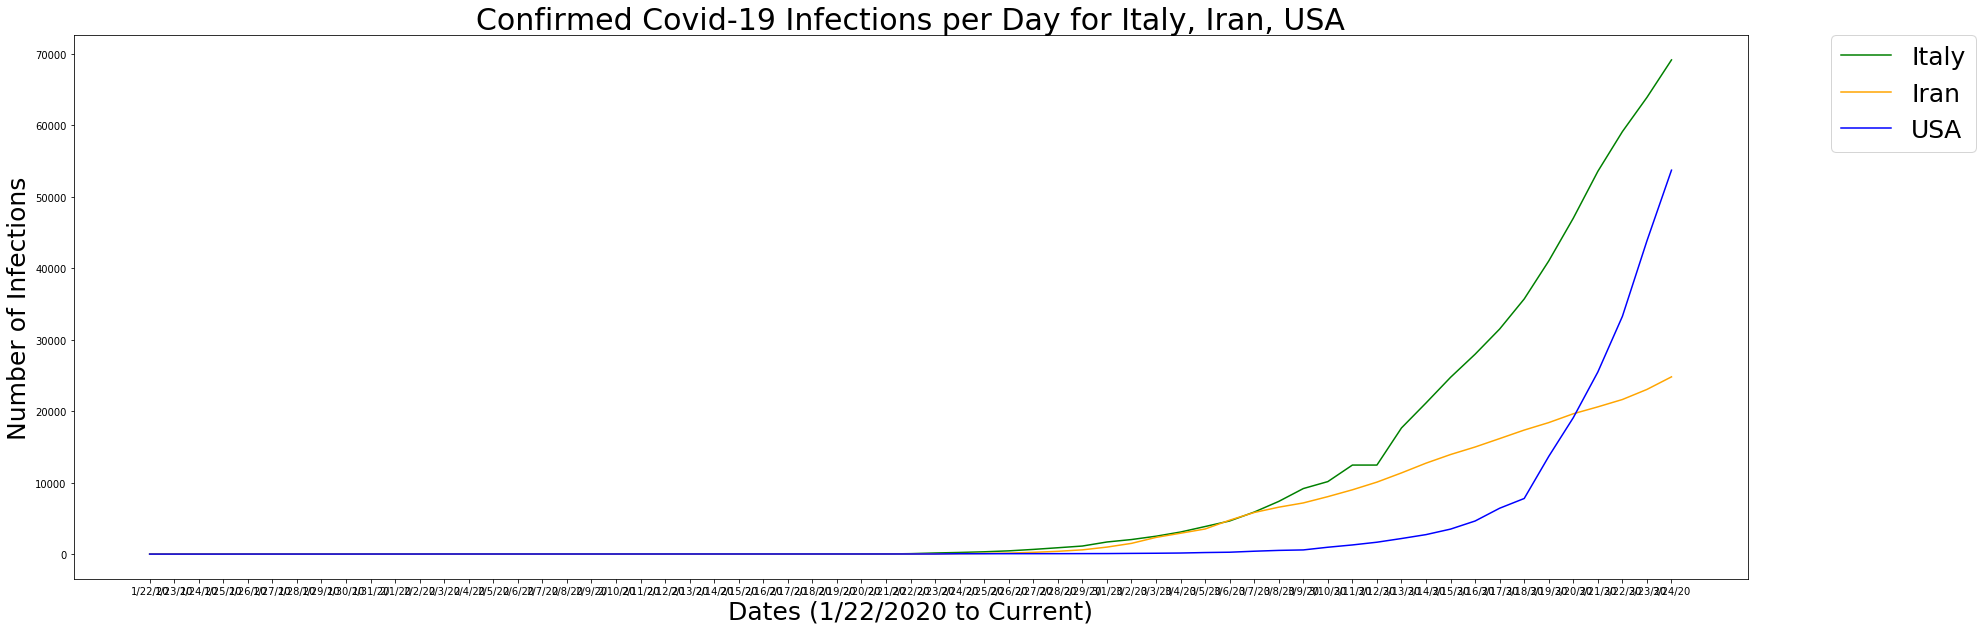

In [132]:
# Create Plot of all Infections since 1/22/2020
line_plot_infections(covid_infections_dates, italy_infections, iran_infections, usa_infections)

In [140]:
# Instead of showing all days since data tracking began, lets look at the last 30 days
# Grab the last 30 days from covid-19 infections dataset
covid_infections_dates30, italy_infections30, iran_infections30, usa_infections30 = last_30_days(covid_infections_dates, italy_infections, iran_infections, usa_infections)

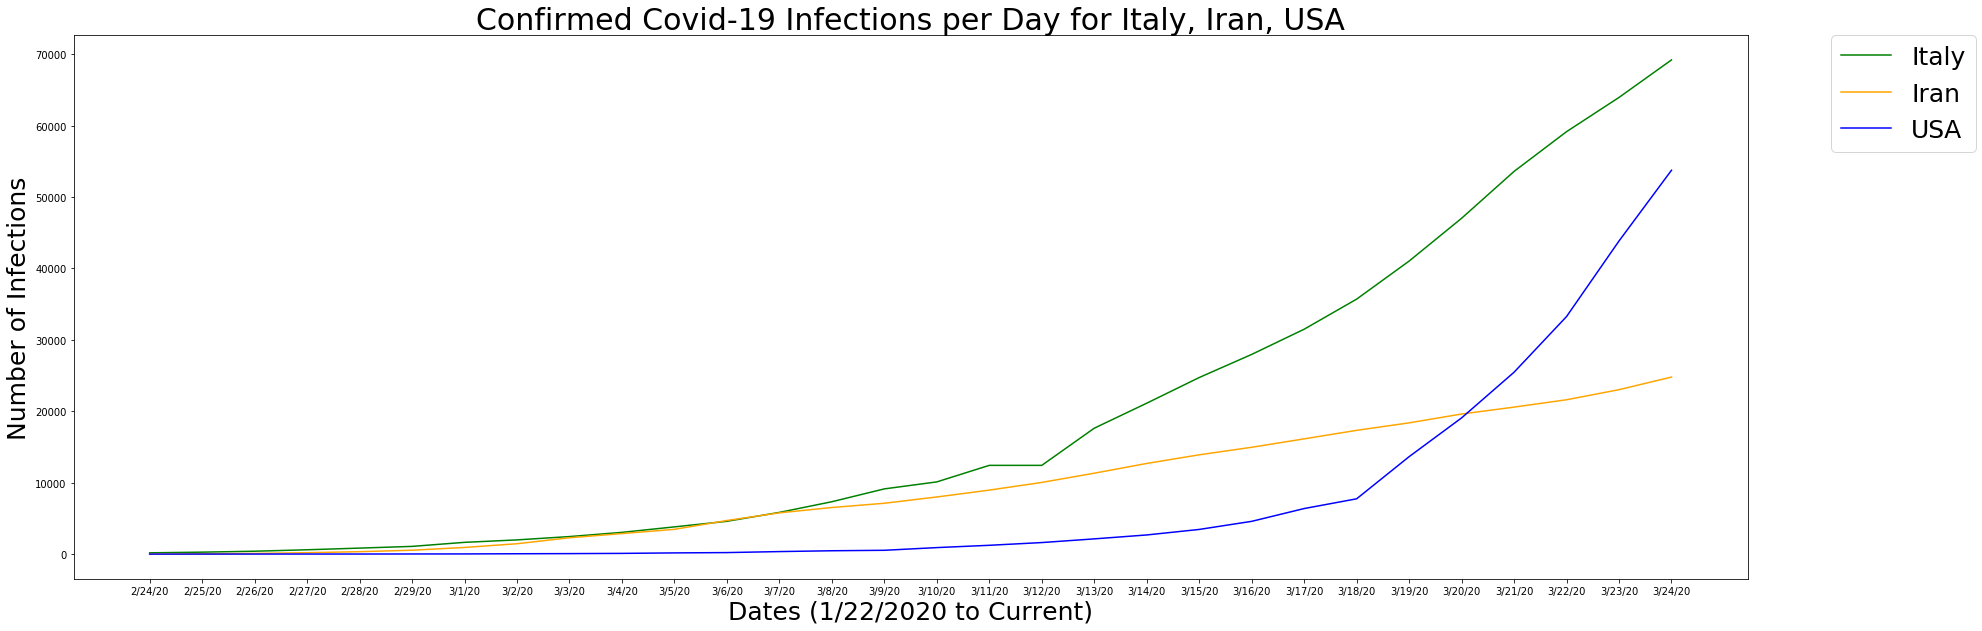

In [141]:
# Create Plot of all Deaths since 2/21/2020
line_plot(covid_infections_dates30, italy_infections30, iran_infections30, usa_infections30)

## III. COVID INFECTIONS VS DEATH: USA
### Data Preparation
In this case I am using previously prepared data, specifically comparing a country's infections vs. death

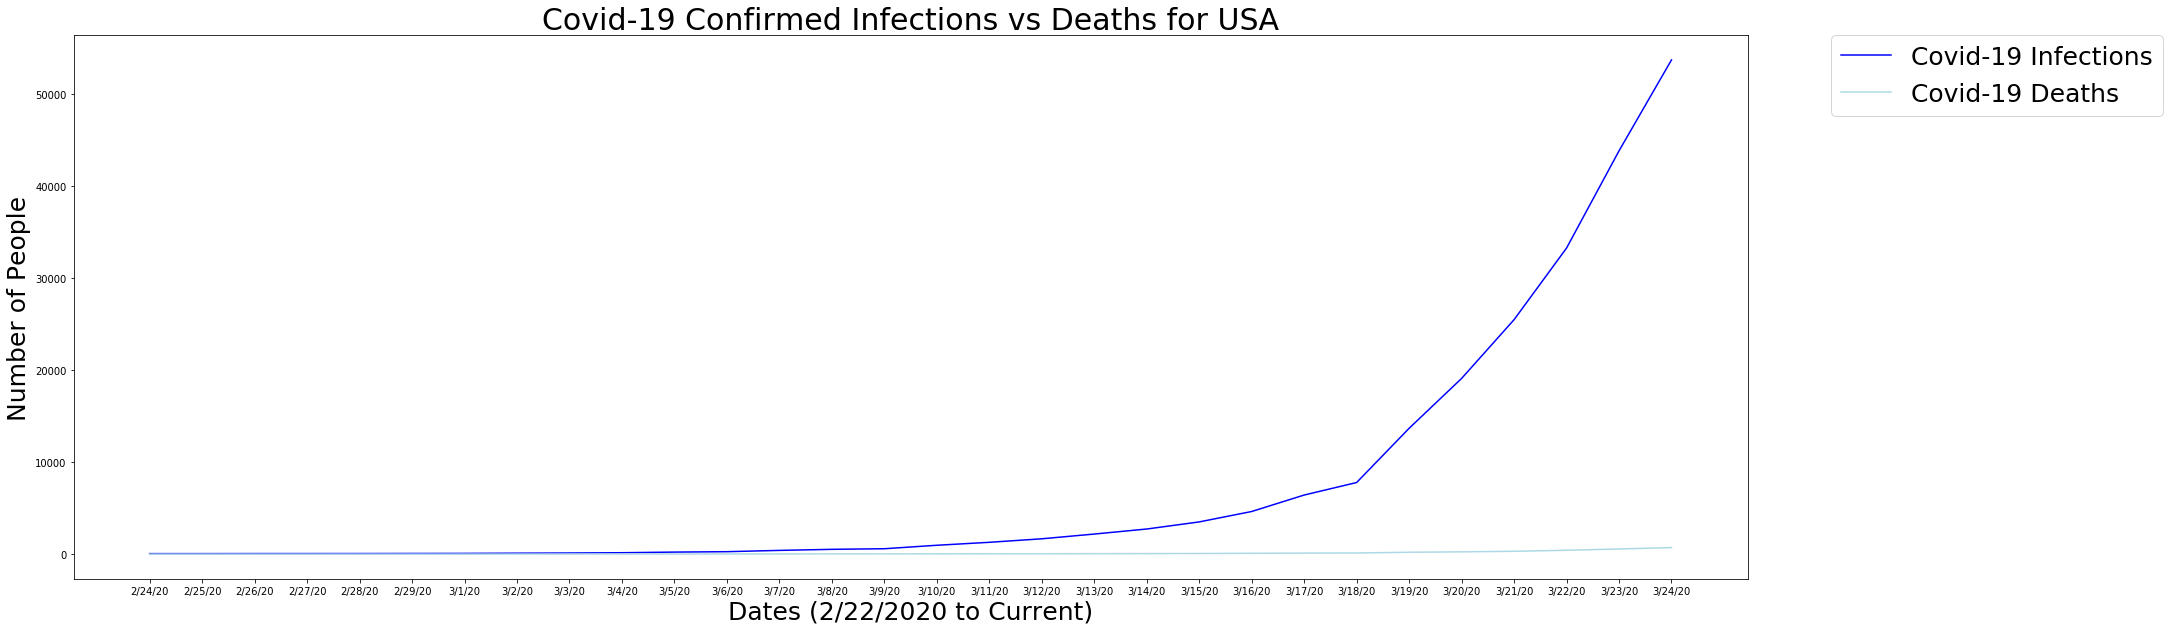

In [144]:
# Taking a look at individual countries;
# Now I want to compare USA's Covid-19 Infections and Deaths over same period of time using data I already have
plot_infections_vs_death(covid_infections_dates30, usa_infections30, usa_deaths30, "USA")

## IV. COVID INFECTIONS VS DEATH: Italy
### Data Preparation
In this case I am using previously prepared data, specifically comparing a country's infections vs. death

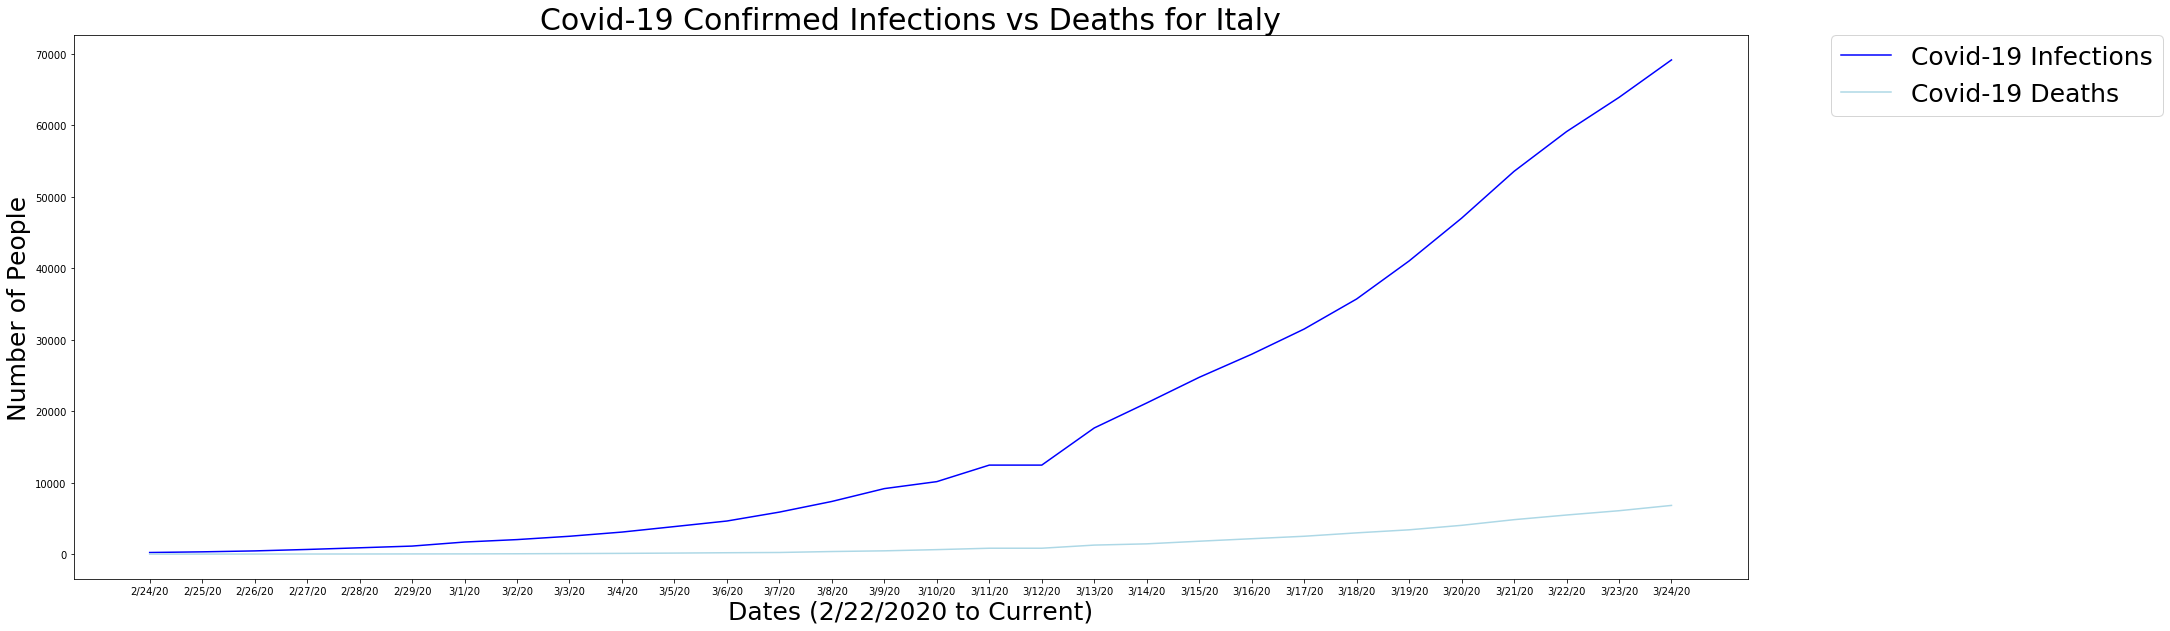

In [145]:
plot_infections_vs_death(covid_infections_dates30, italy_infections30, italy_deaths30, "Italy")

## V. USA COVID BREAKDOWN BY STATE* (TOP 10 MOST INFECTED)
### Data Preparation
**1. Drop un-neccessary columns** - This time I am only dropping the Latitude and Longitude fields as I plan to utilize what is available in the Provice/State field to take a closer look at US Infection data. Specifically, I'm going to drill down to the state level.

**2. Additional Data Prep** - The only additional prepping I am doing is to subset US data and sort the data from most infected place in the US to least infected. This will allow me to grab the top 10 most infected areas of the US in order to plot them.

In [64]:
## NOTE: DO not alter this URL, this is the last known dataset that breaks down US data by state.
## Last date available is 3/22/20, looking for a replacement with more recent data
url_usstates = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Confirmed.csv&filename=time_series_2019-ncov-Confirmed.csv"
usa_infections_state = pd.read_csv(url_usstates) # Read in data
usa_infections_state = usa_infections_state.drop(columns=['Lat', 'Long']) # Drop latitute and longitude (don't need it)
usa_infections_state = usa_infections_state.loc[usa_infections_state['Country/Region'] == 'US'] # Query out USA Infections

In [65]:
# Find top 10 places in US with most infections
# We've already queried out only USA data
# Dynamically sorts descending (most infections -> least infections) by last available date of dataset

usa_infections_state = usa_infections_state.sort_values(by=usa_infections_state.columns[-1], ascending=False).head(10)

# View cities below
usa_infections_state

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
99,New York,US,0,0,0,0,0,0,0,0,...,525,732,967,1706,2495,5365,8310,11710,15793,15793.0
98,Washington,US,0,0,0,0,0,0,0,0,...,572,643,904,1076,1014,1376,1524,1793,1996,1996.0
107,New Jersey,US,0,0,0,0,0,0,0,0,...,69,98,178,267,267,742,890,1327,1914,1914.0
100,California,US,0,0,0,0,0,0,0,0,...,340,426,557,698,751,952,1177,1364,1642,1642.0
110,Illinois,US,0,0,0,0,0,0,0,0,...,64,93,105,161,162,422,585,753,1049,1049.0
146,Michigan,US,0,0,0,0,0,0,0,0,...,25,33,53,65,83,334,552,788,1037,1037.0
138,Louisiana,US,0,0,0,0,0,0,0,0,...,77,91,136,196,257,392,538,585,837,837.0
106,Florida,US,0,0,0,0,0,0,0,0,...,76,115,155,216,314,417,563,659,830,830.0
101,Massachusetts,US,0,0,0,0,0,0,0,0,...,138,164,197,218,218,328,413,525,646,646.0
109,Texas,US,0,0,0,0,0,0,0,0,...,57,72,85,110,173,260,394,581,627,627.0


In [66]:
# Grab data for plot (last 10 days)
# Again, since top most infected states may change, keeping naming as general as possible
# Since dataset is already sorted and subsetted, I can use the iloc feature to pull the last 10 columns
# Will try to make this dynamic too
one = usa_infections_state.iloc[0,53:63]
two = usa_infections_state.iloc[1,53:63]
three = usa_infections_state.iloc[2,53:63]
four = usa_infections_state.iloc[3,53:63]
five = usa_infections_state.iloc[4,53:63]
six = usa_infections_state.iloc[5,53:63]
seven = usa_infections_state.iloc[6,53:63]
eight = usa_infections_state.iloc[7,53:63]
nine = usa_infections_state.iloc[8,53:63]
ten = usa_infections_state.iloc[9,53:63]
usa_infections_dates = covid_infections_dates[-10:]

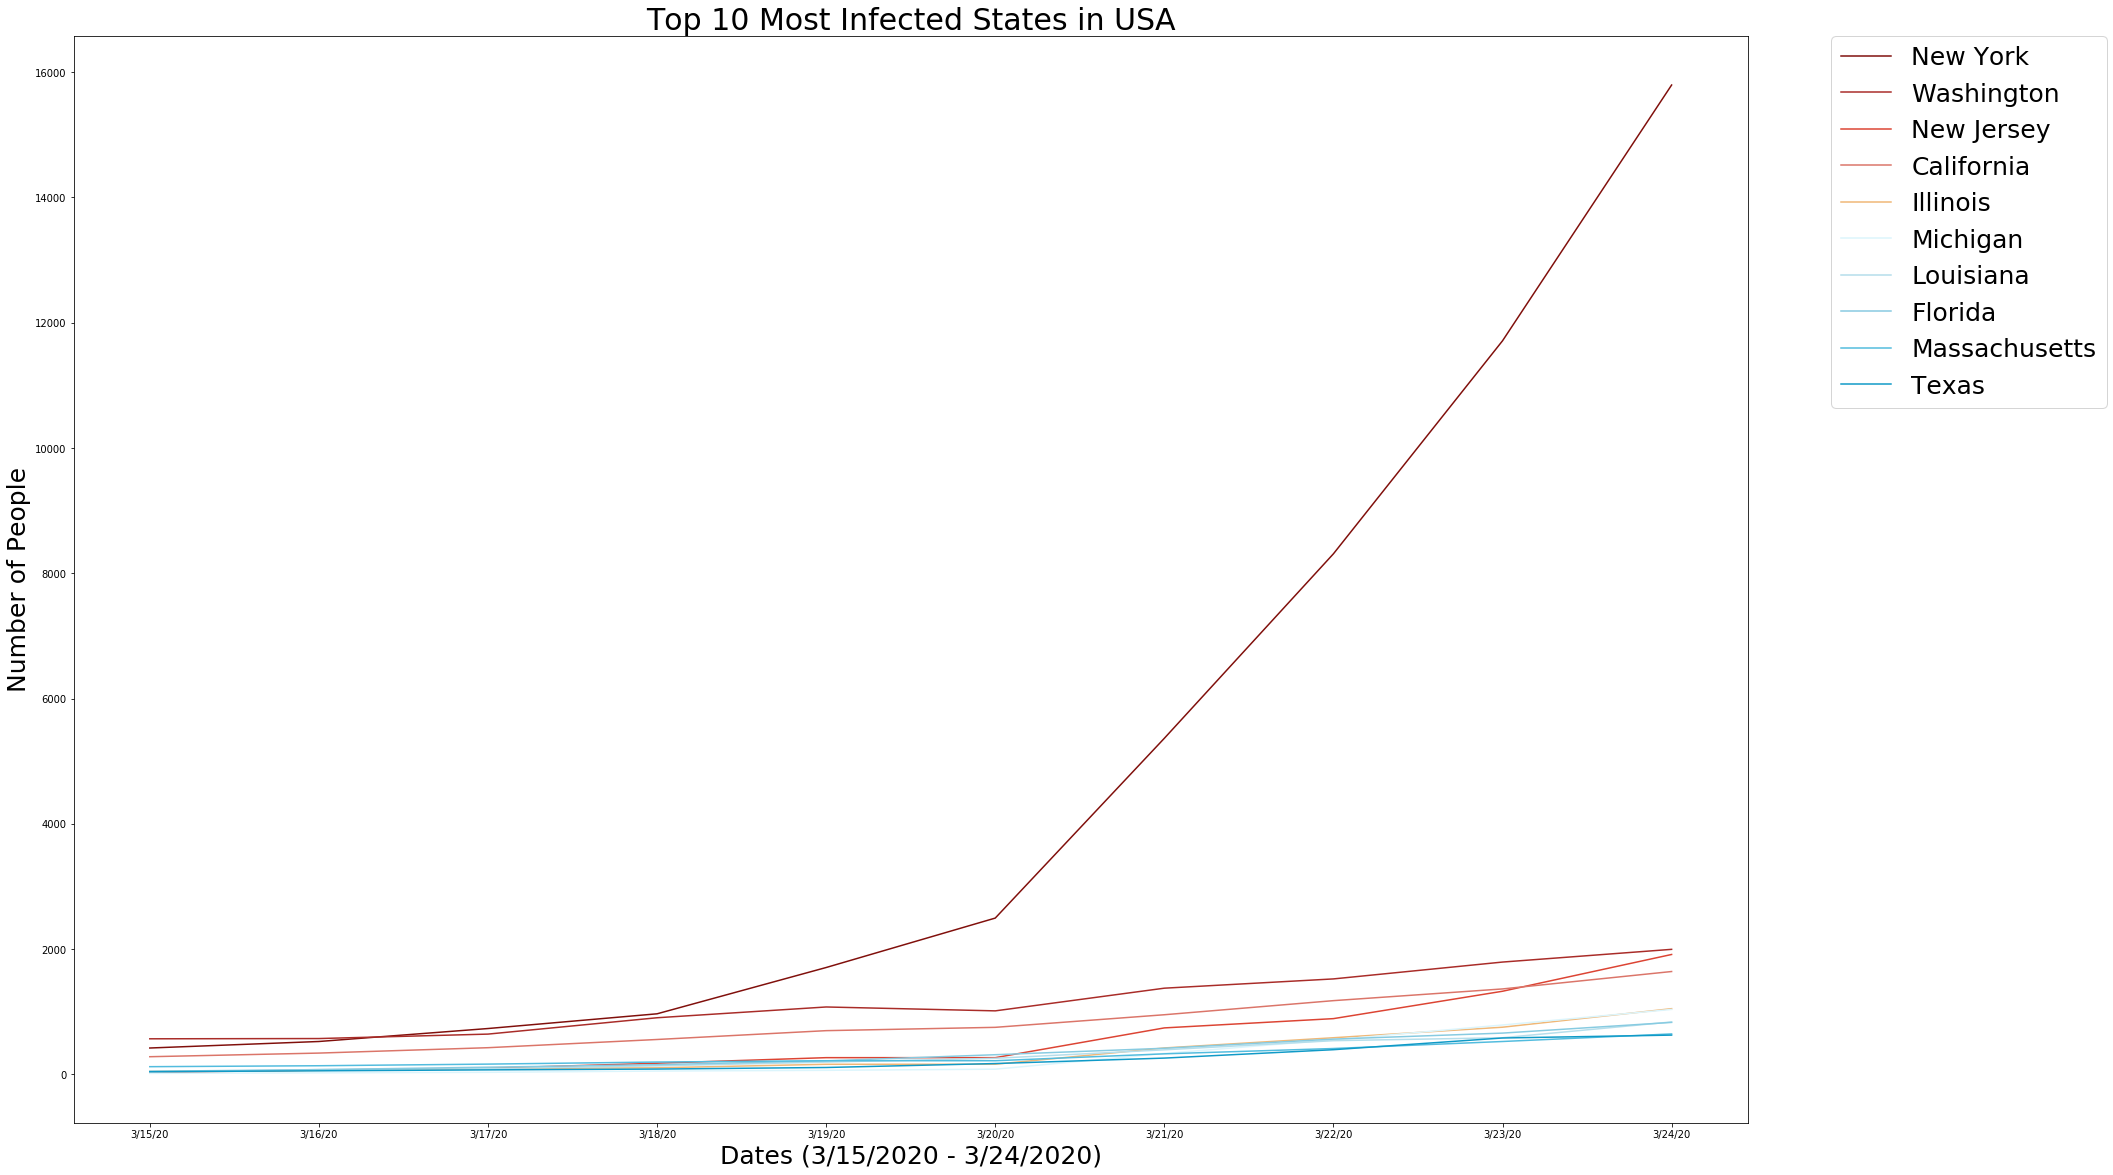

In [95]:
plt.figure(figsize=(30,20))
plt.plot(usa_infections_dates, one, color='#800f0b', label = usa_infections_state.iloc[0,0])
plt.plot(usa_infections_dates, two, color='#a92c28', label = usa_infections_state.iloc[1,0])
plt.plot(usa_infections_dates, three, color='#dc4433', label = usa_infections_state.iloc[2,0])
plt.plot(usa_infections_dates, four, color='#db7569', label = usa_infections_state.iloc[3,0])
plt.plot(usa_infections_dates, five, color='#f0b776', label = usa_infections_state.iloc[4,0])
plt.plot(usa_infections_dates, six, color='#dcf5fc',label = usa_infections_state.iloc[5,0])
plt.plot(usa_infections_dates, seven, color='#b5deeb', label = usa_infections_state.iloc[6,0])
plt.plot(usa_infections_dates, eight, color='#87cbe1', label = usa_infections_state.iloc[7,0])
plt.plot(usa_infections_dates, nine, color='#52bcde', label = usa_infections_state.iloc[8,0])
plt.plot(usa_infections_dates, ten, color='#109ac7', label = usa_infections_state.iloc[9,0])
plt.xlabel('Dates (3/15/2020 - 3/24/2020)', fontsize="25")
plt.ylabel('Number of People', fontsize="25")
plt.title('Top 10 Most Infected States in USA', fontsize="30")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize="25", borderaxespad=0.)
plt.show()

# Modeling
### I. Predicting Future Infections

In [69]:
# I'm going to see if I can predict tomorrow's infections based on current data
# Pull in data
covid_infections_prediction = pd.read_csv(url_infection)

In [70]:
# Create a new column for 3/23/2020 predictions
covid_infections_prediction["Next Day Prediction"] = ""

covid_infections_prediction.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,Next Day Prediction
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21,22,22,22,24,24,40,40,74,
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,54,60,74,87,90,139,201,230,264,
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,1,1,1,1,1,1,1,3,3,
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,56,68,79,97,128,158,266,301,387,
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,52,78,84,115,136,160,194,235,249,
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,2,2,3,4,6,9,19,32,39,
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,171,210,267,307,353,436,669,669,818,


In [73]:
# Setting up our x, y
X = covid_infections_prediction.iloc[:, 4:64] #Using all available dates
y = covid_infections_prediction['3/22/20']

# Seperating Testing and Training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit
lm_model.fit(X_train, y_train)

#Predict
y_test_preds = lm_model.predict(X_test) 

#R2 Score
r2_score(y_test, y_test_preds)

0.9638085783320585

This is a pretty low score, let's see if we can make it more accurate by considering only more recent dates.

In [249]:
# Setting up our x, y
X2 = covid_infections_prediction.iloc[:, -16:-2] #Using last 15 dates
y2 = covid_infections_prediction['3/22/20']

# Seperating Testing and Training data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .30, random_state=42)

#Instantiate
lm_model2 = LinearRegression(normalize=True) 

#Fit
lm_model2.fit(X2_train, y2_train)

#Predict
y2_test_preds = lm_model2.predict(X2_test) 

#R2 Score
r2_score(y2_test, y2_test_preds)

0.9991230072242095

In [248]:
X2

,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,53,59,70,75,82,114,147,177,212,272,322,411
1,581,639,639,701,773,839,825,878,889,924,963,1007
2,160,178,178,200,212,226,243,266,313,345,385,432
3,1,1,1,1,1,1,1,1,1,1,1,1
4,129,149,149,197,238,428,566,673,790,900,1030,1183
...,...,...,...,...,...,...,...,...,...,...,...,...
482,0,0,0,0,0,0,0,0,0,0,0,0
483,0,0,0,0,0,0,0,0,0,0,0,0
484,0,0,0,0,0,0,0,0,0,0,0,0
485,0,0,0,0,0,0,0,0,0,0,0,0


In [239]:
# Create dataframe of Actual number of people infected (note that the index corresponds to the row number of the original dataset)
predicted_vs_actual = y2_test.to_frame()
predicted_vs_actual.columns = ['Actual Infected for 3/22/20']

# Append new row with predicted number of people infected
predicted_vs_actual['Predicted Infected for 3/22/20'] = y2_test_preds.tolist()

# Since the predicted values are decimals, we are going to round them
predicted_vs_actual = predicted_vs_actual.round({'Predicted Infected for 3/22/20': 0}).astype(int)

# Result
predicted_vs_actual

,Actual Infected for 3/22/20,Predicted Infected for 3/22/20
72,37,38
244,0,1
437,6,7
79,40,34
402,19,13
...,...,...
116,505,514
45,131,111
16,59138,60154
450,47,62


Better, but for a final touch, I'd like to add one more row that shows which country goes with with prediction. Note that the index of the dataset corresponds to the row number of the country which is how we are going to pull it.

In [240]:
# Grab index of results dataframe (these numbers correspond to row numbers in the Covid Infections Prediction dataframe)
index_list = predicted_vs_actual.index.values.tolist()

# Create empty list. We're going to fill it with the country name instead of it's row number
countries = []

In [241]:
# Replace row number with country name
prove_state = ""
country = ""

# Loop through Province/State and Country for our list of indexes
# If Province/State is empty, just add Country to list
# Otherwise add Country and Province/State
for i in index_list:
    
    prov_state = covid_infections_prediction.iloc[i,0]
    country = covid_infections_prediction.iloc[i,1]
    
    if prov_state == "":
        countries.append(country)
    else:
        countries.append(country + " : " + prov_state)
    
# Add new column to dataset
predicted_vs_actual['Country/Province, State, or City'] = countries

In [242]:
# Clean-up stuff
# Rearrange columns in a way that makes more sense (Country, Predicited, Actual)
predicted_vs_actual = predicted_vs_actual[['Country/Province, State, or City', 'Predicted Infected for 3/22/20', 'Actual Infected for 3/22/20']]

# Show finished dataset
predicted_vs_actual

,"Country/Province, State, or City",Predicted Infected for 3/22/20,Actual Infected for 3/22/20
72,Liechtenstein,38,37
244,"US : Pierce, WI",1,0
437,Equatorial Guinea,7,6
79,Cameroon,34,40
402,Australia : Australian Capital Territory,13,19
...,...,...,...
116,US : Tennessee,514,505
45,Lithuania,111,131
16,Italy,60154,59138
450,France : Reunion,62,47


# Evaluating Results
### Data Analysis

Note: Analysis is with data as of 3/24/2020. Some of this information is now out-dated to more recent data being available.

1. Taking into account the 3 countries we looked at (Iran, Italy, and the USA), Italy has the most deaths,
followed by Iran and then the USA.


2. Regarding infections, Italy still has the most cases, however the USA is showing a steep trend upward suggesting they may soon surprass Italy with amount of people infected.

### Modeling

1. Based off of available data, it was possible to accurately model the next day's predicted cases. This assumes, however, that nothing has changed and no new measures were put into place to limit spread (such as a vaccine or stricter quarantine laws). This model became more accurate when we only took into account more recent days, instead of all available days data.